# PROJECT 2 PROPOSAL LEVEL-2
# Idea: Wine Quality Prediction

# Data Loading and Cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.DataFrame(pd.read_csv("WineQT.csv"))
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
data.shape

(1143, 13)

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
data.isnull().sum()*100/data.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

# Classifier Models

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target variable (y)
X = data.drop(['quality', 'Id'], axis=1)  # Drop 'quality' and 'Id' columns
y = data['quality']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifier Models
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_pred))

# Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
print("Stochastic Gradient Descent Classifier Accuracy:", sgd_accuracy)
print("Stochastic Gradient Descent Classifier Report:")
print(classification_report(y_test, sgd_pred))

# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print("Support Vector Classifier Accuracy:", svc_accuracy)
print("Support Vector Classifier Report:")
print(classification_report(y_test, svc_pred))


Random Forest Classifier Accuracy: 0.6724890829694323
Random Forest Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.79      0.74        96
           6       0.65      0.62      0.63        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.40      0.41      0.41       229
weighted avg       0.65      0.67      0.66       229

Stochastic Gradient Descent Classifier Accuracy: 0.5720524017467249
Stochastic Gradient Descent Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.49      0.59        96
           6       0.51      0.85      0.64        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00     

# Chemical Qualities

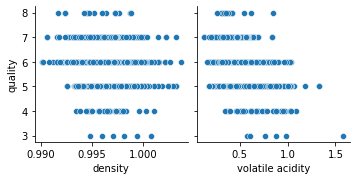

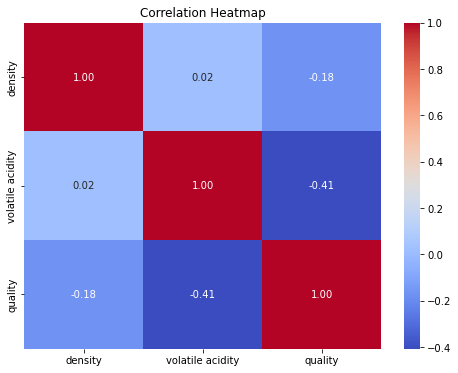

Mean Squared Error: 0.5143168314783604
R-squared: 0.0757559810994215


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features and target variable
features = ['density', 'volatile acidity']  # Features to analyze
target = 'quality'

# Data Exploration and Visualization
# Pairplot to visualize relationships between features and target variable
sns.pairplot(data, x_vars=features, y_vars=target, kind='scatter')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Model Training and Evaluation
# Define features (X) and target variable (y)
X = data[features]
y = data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


# Data Analysis Libraries

In [13]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check basic statistics using Pandas
print("\nBasic statistics of the dataset:")
print(data.describe())

# Check for missing values using Pandas
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Perform array operations using NumPy
# Example: Calculate mean, median, and standard deviation of a numerical column
alcohol_values = data['alcohol'].values
mean_alcohol = np.mean(alcohol_values)
median_alcohol = np.median(alcohol_values)
std_alcohol = np.std(alcohol_values)

print("\nMean alcohol content:", mean_alcohol)
print("Median alcohol content:", median_alcohol)
print("Standard deviation of alcohol content:", std_alcohol)


First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1  

# Data Visualization

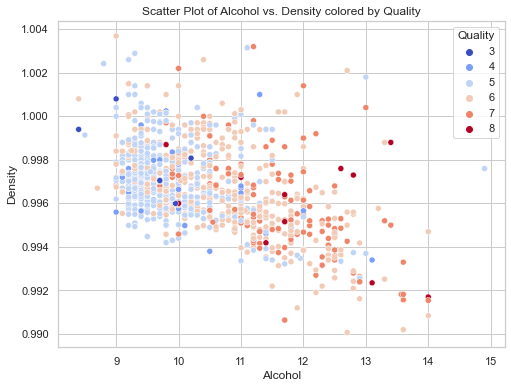

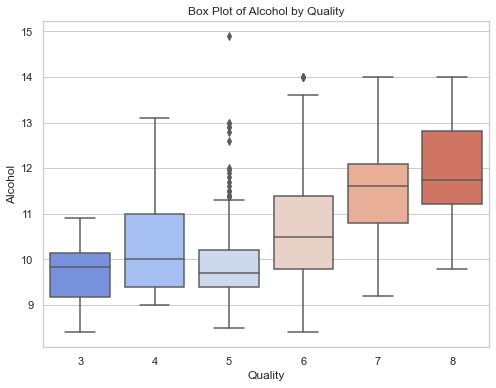

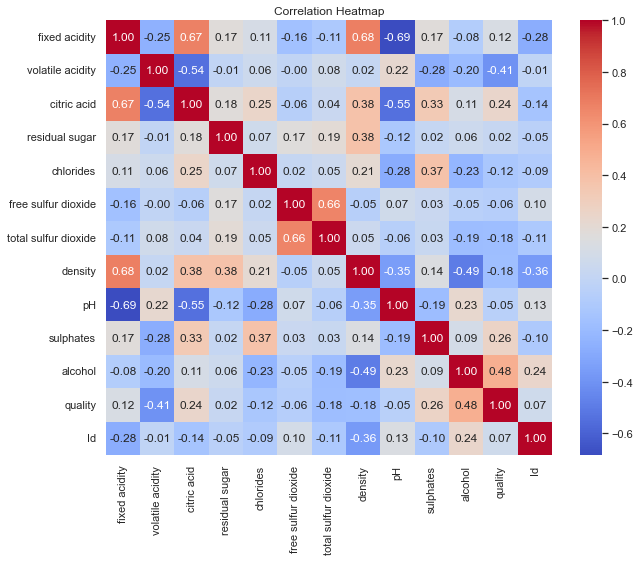

In [14]:
# Set Seaborn style
sns.set(style="whitegrid")

# Example 1: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='density', data=data, hue='quality', palette='coolwarm')
plt.title('Scatter Plot of Alcohol vs. Density colored by Quality')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend(title='Quality')
plt.show()

# Example 2: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=data, palette='coolwarm')
plt.title('Box Plot of Alcohol by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# Example 3: Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
